----------------Sto disegnando il grafico dei superstiti------------------


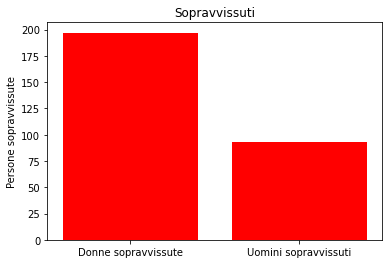

----------------------Stampo i theta-------------------
[-0.4023103  -0.75533304  1.00762089 -0.31252509]
---------------------Plot convergenza------------------


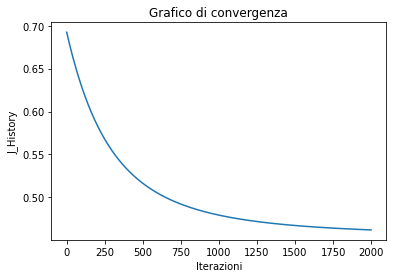

In [1]:
import pandas as pa
import numpy as np
from math import log
import csv
import matplotlib.pyplot as plt
with open("D:/Download/titanicTrain.csv", newline= "", encoding="ISO-8859-1") as filecsv:  #importo i dati dal file csv
    DATI = pa.read_csv('D:/Download/titanicTrain.csv') 
    X = DATI.iloc[:,1:4]         #Costruisco il vettore y e la matrice X
    y = DATI["Survived"]

#print(X)
#print(y)
        
X_Numpy = X.to_numpy(float)
y_Numpy = y.to_numpy(float)    
        
colonnaSesso = X_Numpy[:,1]                       #In questa sezione conto i sopravvissuti(uomini e donne)
colonnaSopravvissuti = y_Numpy[:]

contatoreUominiSopravvissuti = 0
for i in range(len(colonnaSesso)):
    if(colonnaSesso[i] == 0 and colonnaSopravvissuti[i] == 1):
        contatoreUominiSopravvissuti = contatoreUominiSopravvissuti + 1
#print(contatoreUominiSopravvissuti)

contatoreDonneSopravvissute = 0
for i in range(len(colonnaSesso)):
    if(colonnaSesso[i] == 1 and colonnaSopravvissuti[i] == 1):
        contatoreDonneSopravvissute = contatoreDonneSopravvissute + 1
#print(contatoreDonneSopravvissute)

print("----------------Sto disegnando il grafico dei superstiti------------------")
plt.bar(["Donne sopravvissute", "Uomini sopravvissuti"], [contatoreDonneSopravvissute, contatoreUominiSopravvissuti], color = 'red') 
plt.title("Sopravvissuti")                            #Costruisco il grafico
plt.ylabel("Persone sopravvissute") 
plt.show()

def featureNormalize(X):
    X_norm = X
    mu = X.mean(0)
    sigma = X.std(0)                               #Algoritmo di normalizzazione per le features
    r,c = X.shape
    for i in range(c):
        X_norm[:,i] = ((X[:,i] - mu[i]) / sigma[i])
    return X_norm


X_norm = featureNormalize(X_Numpy)
#print(X_norm)
X_norm = np.insert(X_norm, 0, 1, axis = 1)


def sigmoid(z):
    sigmoide = 1 / (1 + np.exp(-1 * z))               #Implemento la sigmoide
    return sigmoide

def costFunction(X, y, theta):
    m = len(y)                                        #Algoritmo della cost function
    h = sigmoid(np.dot(X,theta))
    cost = -y * np.log(h) - (1 - y) * np.log(1 - h)
    J = (1 / m) * sum(cost)
    return J

m,n = X_norm.shape
alpha = 0.007
iterations = 2000
theta_init = np.zeros(n)
lampda = 10

def gradientDescend(X, y, theta, alpha, num_iters, lampda):
    m = len(y);
    alpham = alpha/m;
    J_history = np.zeros(num_iters)
    for i in range(num_iters):                    #Algoritmo gradient descent normalizzato per logical regression
        h = sigmoid(np.dot(X,theta))
        theta = theta * (1 - (alpham * lampda)) - (alpham) * np.dot(np.transpose(X),(h-y))
        J_history[i] = costFunction(X, y, theta)
    return theta, J_history
       
theta, J_history = gradientDescend(X_norm, y, theta_init, alpha, iterations, lampda)
print("----------------------Stampo i theta-------------------")
print(theta)

print("---------------------Plot convergenza------------------")
x = np.arange(0, iterations)
plt.plot(x, J_history)
plt.title("Grafico di convergenza")
plt.xlabel("Iterazioni")                  #eseguo plot della convergenza
plt.ylabel("J_History")
plt.show()

PREDICT_X = X_norm[0:10,:]
predict = np.round(sigmoid(np.dot(PREDICT_X, theta)))
error = predict - y[0:10]                                 #Sezione dedicata alle prediction
absErr = np.abs(error)

